In [3]:
import pandas as pd
import numpy as np
import joblib
import io
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [4]:
pipeline = joblib.load("modelo/modelo_ventas_ciudad.pkl")
pipeline


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:
df = pd.read_csv("data/df_ml.csv")

df["fecha"] = pd.to_datetime(df["fecha"])
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["dia"] = df["fecha"].dt.day
df["dia_semana"] = df["fecha"].dt.dayofweek

df = df.drop(columns=["fecha", "fecha_alta"])

df.head()


,id_venta,id_cliente,id_producto,trimestre,ciudad,días_desde_alta,cliente_antiguo,categoria,cantidad,precio_unitario_catalogo,precio_unitario_venta,importe,medio_pago,año,mes,dia,dia_semana
0,84,72,76,1,Cordoba,295,False,Limpieza,4,4286,4286,17144,efectivo,2024,1,2,1
1,84,72,83,1,Cordoba,295,False,Alimentos,5,1830,1830,9150,efectivo,2024,1,2,1
2,55,100,39,1,Cordoba,269,False,Alimentos,4,469,469,1876,qr,2024,1,4,3
3,8,66,18,1,Villa Maria,305,False,Limpieza,4,3444,3444,13776,transferencia,2024,1,6,5
4,8,66,53,1,Villa Maria,305,False,Alimentos,5,1664,1664,8320,transferencia,2024,1,6,5


### Predicciones

In [6]:
df_pred = df.copy()
df_pred["prediccion"] = pipeline.predict(df_pred)
df_pred.head()


,id_venta,id_cliente,id_producto,trimestre,ciudad,días_desde_alta,cliente_antiguo,categoria,cantidad,precio_unitario_catalogo,precio_unitario_venta,importe,medio_pago,año,mes,dia,dia_semana,prediccion
0,84,72,76,1,Cordoba,295,False,Limpieza,4,4286,4286,17144,efectivo,2024,1,2,1,17144.949219
1,84,72,83,1,Cordoba,295,False,Alimentos,5,1830,1830,9150,efectivo,2024,1,2,1,9149.434570
2,55,100,39,1,Cordoba,269,False,Alimentos,4,469,469,1876,qr,2024,1,4,3,1875.071289
3,8,66,18,1,Villa Maria,305,False,Limpieza,4,3444,3444,13776,transferencia,2024,1,6,5,13180.849609
4,8,66,53,1,Villa Maria,305,False,Alimentos,5,1664,1664,8320,transferencia,2024,1,6,5,8319.920898


### Filtros (manuales en Jupyter)

In [7]:
# Elegí los filtros que quieras aplicar
f_ciudad = None        # Ej: "Cordoba"
f_categoria = None     # Ej: "Electrónica"
f_mes = None           # Ej: 5
f_medio_pago = None    # Ej: "Tarjeta"

df_filtrado = df_pred.copy()

if f_ciudad:
    df_filtrado = df_filtrado[df_filtrado["ciudad"] == f_ciudad]

if f_categoria:
    df_filtrado = df_filtrado[df_filtrado["categoria"] == f_categoria]

if f_mes:
    df_filtrado = df_filtrado[df_filtrado["mes"] == f_mes]

if f_medio_pago:
    df_filtrado = df_filtrado[df_filtrado["medio_pago"] == f_medio_pago]

df_filtrado.head()


,id_venta,id_cliente,id_producto,trimestre,ciudad,días_desde_alta,cliente_antiguo,categoria,cantidad,precio_unitario_catalogo,precio_unitario_venta,importe,medio_pago,año,mes,dia,dia_semana,prediccion
0,84,72,76,1,Cordoba,295,False,Limpieza,4,4286,4286,17144,efectivo,2024,1,2,1,17144.949219
1,84,72,83,1,Cordoba,295,False,Alimentos,5,1830,1830,9150,efectivo,2024,1,2,1,9149.434570
2,55,100,39,1,Cordoba,269,False,Alimentos,4,469,469,1876,qr,2024,1,4,3,1875.071289
3,8,66,18,1,Villa Maria,305,False,Limpieza,4,3444,3444,13776,transferencia,2024,1,6,5,13180.849609
4,8,66,53,1,Villa Maria,305,False,Alimentos,5,1664,1664,8320,transferencia,2024,1,6,5,8319.920898


### Ventas por ciudad

In [8]:
ventas_por_ciudad = df_filtrado.groupby("ciudad")["importe"].sum()
ventas_por_ciudad


ciudad
Alta Gracia    481504
Carlos Paz     353852
Cordoba        481482
Mendiolaza     229026
Rio Cuarto     792203
Villa Maria    313350
Name: importe, dtype: int64

### KPIs generales

In [11]:
ventas_totales = df_filtrado["importe"].sum()
ventas_predichas = df_filtrado["prediccion"].sum()
ticket_promedio = df_filtrado["importe"].mean()

print("💰 Ventas reales:", round(ventas_totales, 2))
print("🔮 Ventas predichas:", round(ventas_predichas, 2))
print(f"🔮 Ventas predichas: ${ventas_predichas:,.2f}")
print("🧾 Ticket promedio:", round(ticket_promedio, 2))


💰 Ventas reales: 2651417
🔮 Ventas predichas: 2.6486575e+06
🔮 Ventas predichas: $2,648,657.50
🧾 Ticket promedio: 7730.08


### Tendencia temporal

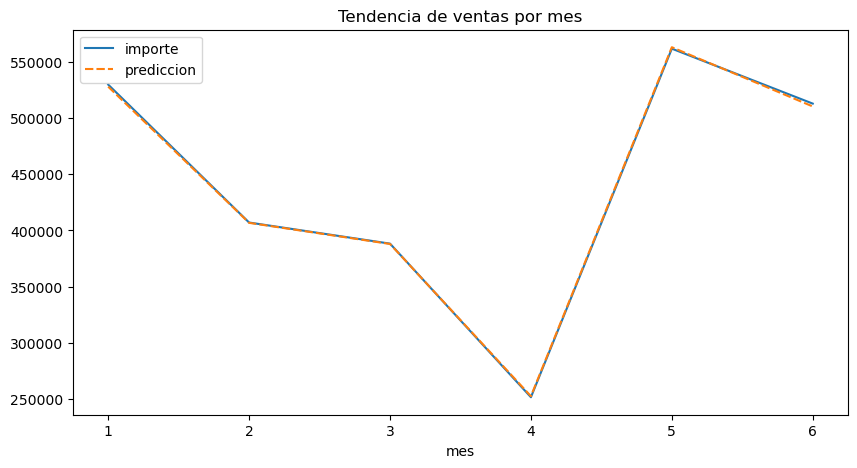

In [12]:
tendencia = df_filtrado.groupby("mes")[["importe", "prediccion"]].sum()

plt.figure(figsize=(10,5))
sns.lineplot(data=tendencia)
plt.title("Tendencia de ventas por mes")
plt.show()


### Comparación por categoría

<Figure size 1000x500 with 0 Axes>

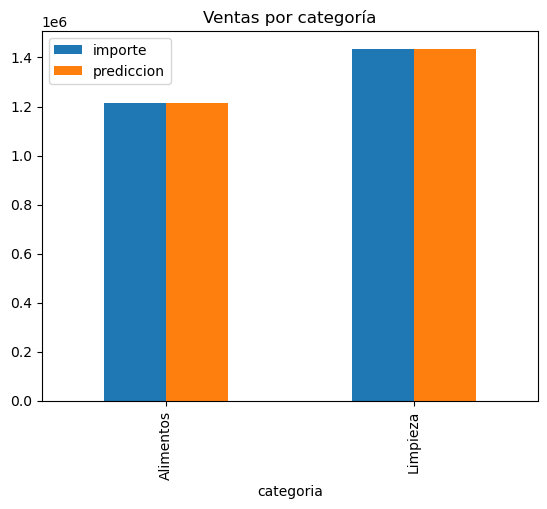

In [13]:
ventas_cat = df_filtrado.groupby("categoria")[["importe", "prediccion"]].sum()

plt.figure(figsize=(10,5))
ventas_cat.plot(kind="bar")
plt.title("Ventas por categoría")
plt.show()


### Mapa geográfico

In [14]:
coords = {
    "Cordoba": (-31.4201, -64.1888),
    "Villa Maria": (-32.4075, -63.2402),
    "Alta Gracia": (-31.6583, -64.4283),
    "Rio Cuarto": (-33.1232, -64.3493),
    "Carlos Paz": (-31.4241, -64.4978),
    "Mendiolaza": (-31.2828, -64.2964)
}

df_map = df_filtrado.groupby("ciudad")["prediccion"].sum().reset_index()
df_map["lat"] = df_map["ciudad"].map(lambda x: coords[x][0])
df_map["lon"] = df_map["ciudad"].map(lambda x: coords[x][1])

df_map


,ciudad,prediccion,lat,lon
0,Alta Gracia,479874.375000,-31.6583,-64.4283
1,Carlos Paz,355073.437500,-31.4241,-64.4978
2,Cordoba,480430.468750,-31.4201,-64.1888
3,Mendiolaza,228317.265625,-31.2828,-64.2964
4,Rio Cuarto,791534.250000,-33.1232,-64.3493
5,Villa Maria,313427.812500,-32.4075,-63.2402


### Ranking de productos

In [15]:
ranking_productos = (
    df_filtrado.groupby("id_producto")["prediccion"]
    .sum()
    .sort_values(ascending=False)
)

ranking_productos.head(20)


id_producto
91     93077.367188
18     87337.515625
76     85718.851562
72     81934.195312
9      77885.804688
8      72034.359375
59     68018.226562
58     66890.484375
68     59150.687500
79     58575.058594
81     55225.640625
100    53217.492188
86     49079.132812
35     48729.976562
6      45869.960938
7      45764.652344
2      44754.683594
17     43557.281250
98     43174.820312
78     42880.062500
Name: prediccion, dtype: float32

### Exportar CSV

In [16]:
df_filtrado.to_csv("reporte.csv", index=False)
"Archivo CSV generado: reporte.csv"


'Archivo CSV generado: reporte.csv'

### Exportar Excel

In [ ]:
with pd.ExcelWriter("reporte.xlsx", engine="xlsxwriter") as writer:
    df_filtrado.to_excel(writer, sheet_name="Reporte", index=False)

"Archivo Excel generado: reporte.xlsx"
